# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Cross-validation:
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_predict, StratifiedKFold

# Metrics
from sklearn.metrics import make_scorer, PredictionErrorDisplay, accuracy_score, precision_score, f1_score, recall_score, balanced_accuracy_score, roc_auc_score
# Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from catboost import CatBoostClassifier

# Hyperparameters optimization:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/vaccines_features.csv', sep=',')

### To do more manageable the dataset, we'll reduce it until 30%.

In [3]:
sample_df = df.sample(frac=0.3, replace=False, random_state=42)

# 3. Cross Validation

In [4]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Declare scores to be used
scores = {
    "roc_auc": make_scorer(roc_auc_score, needs_proba=True),
    "balanced_accuracy": make_scorer(balanced_accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "accuracy": make_scorer(accuracy_score)
}

# Create a function to show the metrics:
def print_metrics(cv_results):
    for sc in scores.keys():
        print(f"Train {sc}: {round(cv_results[f'train_{sc}'].mean() * 100, 1)}%")
    print()
    for sc in scores.keys():
        print(f"Validation {sc}: {round(cv_results[f'test_{sc}'].mean() * 100, 1)}%")
        
# For Grid and Random Search:
def print_search_metrics(search_results):
    print("Best RandomSearchCV parameters: ", search_results.best_params_)
    print()
    print("train metrics:")
    print('Train ROC AUC:', round(search_results.cv_results_['mean_train_roc_auc'][search_results.best_index_] * 100 ,2))
    print('Train balanced accuracy:', round(search_results.cv_results_['mean_train_balanced_accuracy'][search_results.best_index_] * 100 ,2))
    print('Train accuracy:', round(search_results.cv_results_['mean_train_accuracy'][search_results.best_index_] * 100 ,2))
    print('Train precision:', round(search_results.cv_results_['mean_train_precision'][search_results.best_index_] * 100 ,2))
    print('Train recall:', round(search_results.cv_results_['mean_train_recall'][search_results.best_index_] * 100 ,2))
    print('Train f1:', round(search_results.cv_results_['mean_train_f1'][search_results.best_index_] * 100 ,2))
    print()
    print("Validation metrics:")
    print('Validation ROC AUC:', round(search_results.cv_results_['mean_test_roc_auc'][search_results.best_index_] * 100 ,2))
    print('Validation balanced accuracy:', round(search_results.cv_results_['mean_test_balanced_accuracy'][search_results.best_index_] * 100 ,2))
    print('Validation accuracy:', round(search_results.cv_results_['mean_test_accuracy'][search_results.best_index_] * 100 ,2))
    print('Validation precision:', round(search_results.cv_results_['mean_test_precision'][search_results.best_index_] * 100 ,2))
    print('Validation recall:', round(search_results.cv_results_['mean_test_recall'][search_results.best_index_] * 100 ,2))
    print('Validation f1:', round(search_results.cv_results_['mean_test_f1'][search_results.best_index_] * 100 ,2))

c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


# Split Train and Test:

In [5]:
X = sample_df.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1)
y = sample_df[["h1n1_vaccine", "seasonal_vaccine"]]
# Using 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify = y,
                                                    test_size=0.2, random_state=42)

# H1N1 Vaccine:
## Baseline:
### Most frequent:
In this case, due that the dataset is imbalanced, we can apply the most frequent tecnique, that will lead us to an accuracy of the majority representation, despite we'll know that all the ones that have been vaccinated with the H1N1 vaccine will have a wrong prediction.

In [6]:
## Most frequent:
bl1 = DummyClassifier(strategy='most_frequent')
bl1_cv = cross_validate(bl1, X_train, y_train["h1n1_vaccine"], cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(bl1_cv)

Train roc_auc: 50.0%
Train balanced_accuracy: 50.0%
Train precision: 0.0%
Train recall: 0.0%
Train f1: 0.0%
Train accuracy: 78.9%

Validation roc_auc: 50.0%
Validation balanced_accuracy: 50.0%
Validation precision: 0.0%
Validation recall: 0.0%
Validation f1: 0.0%
Validation accuracy: 78.9%


c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alumne_mati1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Linear Regression Classifier

In [7]:
lr1 = LogisticRegression(max_iter=10_000)
lr1_cv = cross_validate(lr1, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(lr1_cv)

Train roc_auc: 86.0%
Train balanced_accuracy: 71.3%
Train precision: 72.4%
Train recall: 47.5%
Train f1: 57.3%
Train accuracy: 85.1%

Validation roc_auc: 84.5%
Validation balanced_accuracy: 70.4%
Validation precision: 69.7%
Validation recall: 46.2%
Validation f1: 55.5%
Validation accuracy: 84.4%


With the linear regression baseline, we've improved a bit, but that's still a bit untrue, as what is most rellevant about H1N1 vaccination, is that the dataset is not balanced. There are way more indivuduals that hasn't been vaccinated than has been vaccinated. To deal this imbalanced dataset, we have to apply balancing methods. Let's try a final baseline model with balanced target and also applying cross validation:

In [8]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

bl1_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('LR', LogisticRegression(max_iter=10_000))
 ])

bl1_cv = cross_validate(bl1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(bl1_cv)

Train roc_auc: 85.5%
Train balanced_accuracy: 77.7%
Train precision: 48.2%
Train recall: 78.0%
Train f1: 59.5%
Train accuracy: 77.6%

Validation roc_auc: 84.1%
Validation balanced_accuracy: 76.4%
Validation precision: 47.0%
Validation recall: 75.7%
Validation f1: 58.0%
Validation accuracy: 76.8%


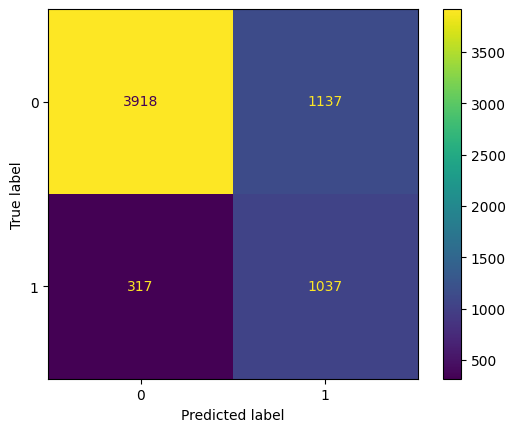

In [9]:
# cross_val_predict returns the predictions for each data point in the validation sets
bl1_val_preds = cross_val_predict(bl1_pipe,  X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf)

bl1_cm = confusion_matrix(y_train["h1n1_vaccine"], bl1_val_preds, labels=[0, 1])
bl1_disp = ConfusionMatrixDisplay(confusion_matrix=bl1_cm,
                              display_labels=[0, 1])
bl1_disp.plot()
plt.show()

Now that we have set a few baselines, let's start with more complex models as:
## Random Forest:

In [10]:
rf1_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('RF', RandomForestClassifier(n_jobs=-1))
 ])

rf1_cv = cross_validate(rf1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(rf1_cv)

Train roc_auc: 99.0%
Train balanced_accuracy: 92.1%
Train precision: 62.9%
Train recall: 100.0%
Train f1: 77.2%
Train accuracy: 87.5%

Validation roc_auc: 85.0%
Validation balanced_accuracy: 77.8%
Validation precision: 49.1%
Validation recall: 76.9%
Validation f1: 60.0%
Validation accuracy: 78.3%


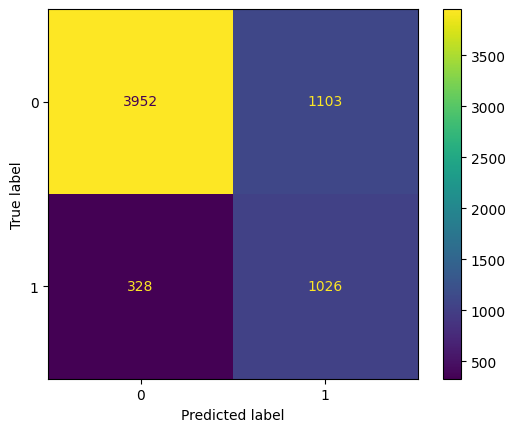

In [11]:
# cross_val_predict returns the predictions for each data point in the validation sets
rf1_val_preds = cross_val_predict(rf1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf)

rf1_cm = confusion_matrix(y_train["h1n1_vaccine"], rf1_val_preds, labels=[0, 1])
rf1_disp = ConfusionMatrixDisplay(confusion_matrix=rf1_cm,
                              display_labels=[0, 1])
rf1_disp.plot()
plt.show()

In [12]:
# rf2_pipe = ImbPipeline([
#     ('RUS', RandomUnderSampler()),
#     ('RFC', RandomForestClassifier())
#  ])

# param_dist_rf = {
#     "RFC__n_estimators": np.arange(50, 2000, 50),
#     "RFC__max_depth": np.arange(2, 15),
#     "RFC__min_samples_split": np.arange(2, 11),
#     "RFC__min_samples_leaf": np.arange(1, 11),
#     "RFC__criterion": ['entropy', 'log_loss', 'gini'],
#     "RFC__max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# rf2_rscv = RandomizedSearchCV(rf2_pipe,
#                              param_distributions=param_dist_rf,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)
# rf2_rscv.fit(X_train, y_train["h1n1_vaccine"].values.ravel())

# print_search_metrics(rf2_rscv)

In [13]:
# # Get the indices of the smallest MAE values
# best_indices = np.argsort(rf2_rscv.cv_results_['mean_test_roc_auc'])[-5:]

# # Show best MAEs and their corresponding hyperparams.
# for i in best_indices:
#     print('ROC AUC:', round(rf2_rscv.cv_results_['mean_test_roc_auc'][i] * 100 ,2))
#     print('Balanced Accuracy:', round(rf2_rscv.cv_results_['mean_test_balanced_accuracy'][i] * 100 ,2))
#     print('Hyperparams:', rf2_rscv.cv_results_['params'][i])
#     print()

NameError: name 'rf2_rscv' is not defined

In [14]:
rf3_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('RF', RandomForestClassifier(n_estimators=1950, 
                                  min_samples_split= 8, 
                                  min_samples_leaf=2, 
                                  max_features="sqrt",
                                  max_depth= 14,
                                  criterion = "entropy",
                                  n_jobs=-1))
 ])

rf3_cv = cross_validate(rf3_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(rf3_cv)

Train roc_auc: 94.3%
Train balanced_accuracy: 86.0%
Train precision: 57.8%
Train recall: 89.5%
Train f1: 70.3%
Train accuracy: 84.0%

Validation roc_auc: 85.3%
Validation balanced_accuracy: 77.8%
Validation precision: 49.2%
Validation recall: 76.9%
Validation f1: 60.0%
Validation accuracy: 78.3%


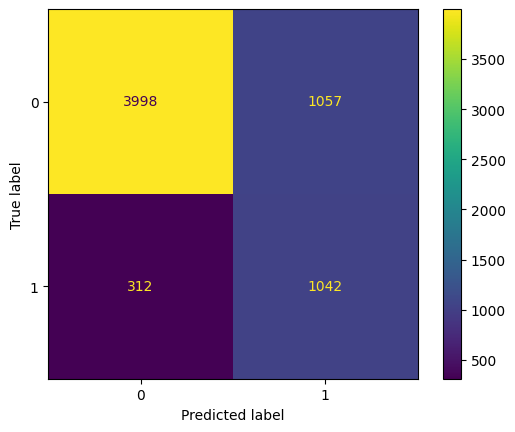

In [15]:
# cross_val_predict returns the predictions for each data point in the validation sets
rf3_val_preds = cross_val_predict(rf3_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf)

rf3_cm = confusion_matrix(y_train["h1n1_vaccine"], rf3_val_preds, labels=[0, 1])
rf3_disp = ConfusionMatrixDisplay(confusion_matrix=rf3_cm,
                              display_labels=[0, 1])
rf3_disp.plot()
plt.show()

## Balanced Random Forest:

In [16]:
brf1 = BalancedRandomForestClassifier(bootstrap=True, sampling_strategy="auto", replacement=False)
brf1_cv = cross_validate(brf1, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf, scoring=scores, return_train_score=True)

print_metrics(brf1_cv)

Train roc_auc: 99.9%
Train balanced_accuracy: 94.3%
Train precision: 70.0%
Train recall: 100.0%
Train f1: 82.4%
Train accuracy: 91.0%

Validation roc_auc: 84.9%
Validation balanced_accuracy: 77.4%
Validation precision: 49.2%
Validation recall: 75.8%
Validation f1: 59.7%
Validation accuracy: 78.3%


In [17]:
# param_dist_brf = {
#     "n_estimators": np.arange(50, 2000, 50),
#     "criterion": ['entropy', 'gini'],
#     "max_depth": np.arange(2, 15),
#     "min_samples_split": np.arange(2, 50),
#     "min_samples_leaf": np.arange(2, 50),
#     "max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# brf_rscv = RandomizedSearchCV(BalancedRandomForestClassifier(bootstrap=True, sampling_strategy = "auto", replacement=False),
#                              param_distributions=param_dist_brf,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)

# brf_rscv.fit(X_train, y_train["seasonal_vaccine"].values.ravel())

# print_search_metrics(brf_rscv)

## Gradient Boosted Decision Trees (GBDT)

In [18]:
gbdt1_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('GBDT', GradientBoostingClassifier())
 ])

gbdt1_cv = cross_validate(gbdt1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(gbdt1_cv)

Train roc_auc: 89.2%
Train balanced_accuracy: 81.0%
Train precision: 53.2%
Train recall: 81.2%
Train f1: 64.3%
Train accuracy: 80.9%

Validation roc_auc: 85.6%
Validation balanced_accuracy: 77.8%
Validation precision: 49.7%
Validation recall: 76.4%
Validation f1: 60.2%
Validation accuracy: 78.7%


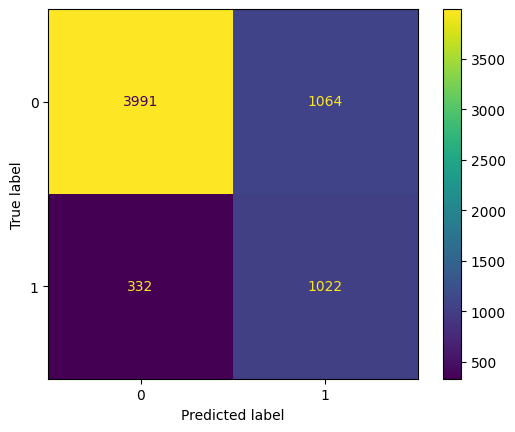

In [19]:
# cross_val_predict returns the predictions for each data point in the validation sets
gbdt1_val_preds = cross_val_predict(gbdt1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf)

gbdt1_cm = confusion_matrix(y_train["h1n1_vaccine"], gbdt1_val_preds, labels=[0, 1])
gbdt1_disp = ConfusionMatrixDisplay(confusion_matrix=gbdt1_cm,
                              display_labels=[0, 1])
gbdt1_disp.plot()
plt.show()

In [20]:
# gbdt2_pipe = ImbPipeline([
#     ('RUS', RandomUnderSampler()),
#     ('GBDT', GradientBoostingClassifier())
#  ])

# param_dist_gbdt = {
#     "GBDT__loss": ["log_loss", "exponential"],
#     "GBDT__learning_rate": np.arange(0.025, 0.25, 0.025),
#     "GBDT__n_estimators": np.arange(50, 2000, 50),
#     "GBDT__max_depth": np.arange(2, 15),
#     "GBDT__min_samples_split": np.arange(2, 25),
#     "GBDT__min_samples_leaf": np.arange(1, 25),
#     "GBDT__criterion": ['friedman_mse', 'squared_error'],
#     "GBDT__max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# gbdt2_rscv = RandomizedSearchCV(gbdt2_pipe,
#                              param_distributions=param_dist_gbdt,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)
# gbdt2_rscv.fit(X_train, y_train["h1n1_vaccine"].values.ravel())

# print_search_metrics(gbdt2_rscv)

In [21]:
gbdt2_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('GBDT', GradientBoostingClassifier(n_estimators = 100,
                                        min_samples_split = 3,
                                        min_samples_leaf = 7,
                                        max_features = 0.7,
                                        max_depth = 2,
                                        loss = "log_loss",
                                        learning_rate = 0.175,
                                        criterion = "squared_error"))
 ])

gbdt2_cv = cross_validate(gbdt2_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(gbdt2_cv)

Train roc_auc: 88.1%
Train balanced_accuracy: 79.8%
Train precision: 51.9%
Train recall: 79.2%
Train f1: 62.7%
Train accuracy: 80.1%

Validation roc_auc: 85.8%
Validation balanced_accuracy: 77.5%
Validation precision: 49.2%
Validation recall: 76.1%
Validation f1: 59.8%
Validation accuracy: 78.4%


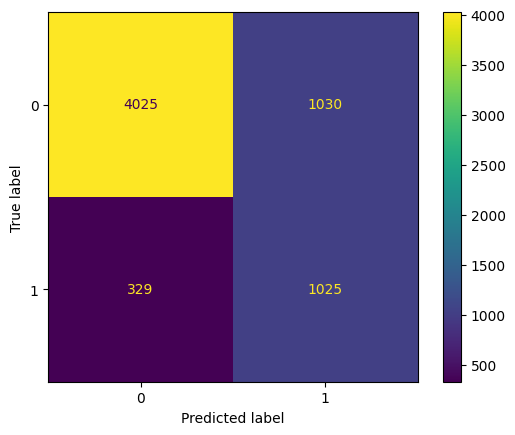

In [22]:
# cross_val_predict returns the predictions for each data point in the validation sets
gbdt2_val_preds = cross_val_predict(gbdt2_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf)

gbdt2_cm = confusion_matrix(y_train["h1n1_vaccine"], gbdt2_val_preds, labels=[0, 1])
gbdt2_disp = ConfusionMatrixDisplay(confusion_matrix=gbdt2_cm,
                              display_labels=[0, 1])
gbdt2_disp.plot()
plt.show()

# Seasonal Vaccine:
## Baseline:
### Most frequent:
For the seasonal vaccine, we're lucky that our data is pretty much balanced, so it won't be necessary to do any adjustment to correct the imbalancement as we've done with the H1N1 vaccine prediction. On the other hand, for this case, it doesn't make sense to do a dummy classifier with the most frecuent class label, as it'll be almost 50%. We'll stablish our baseline witha k-NN algorithm with only 3 neighbours.

In [23]:
## Most frequent:
bl2 = KNeighborsClassifier(n_neighbors=3)
bl2_cv = cross_validate(bl2, X_train, y_train["seasonal_vaccine"], cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(bl2_cv)

Train roc_auc: 92.0%
Train balanced_accuracy: 83.9%
Train precision: 83.8%
Train recall: 81.0%
Train f1: 82.4%
Train accuracy: 84.1%

Validation roc_auc: 75.1%
Validation balanced_accuracy: 70.9%
Validation precision: 68.8%
Validation recall: 67.7%
Validation f1: 68.2%
Validation accuracy: 71.1%


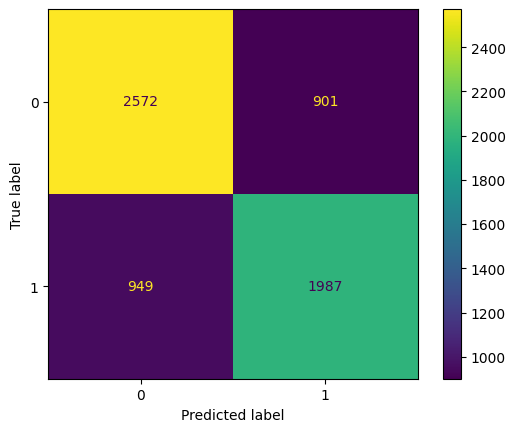

In [24]:
# cross_val_predict returns the predictions for each data point in the validation sets
bl2_val_preds = cross_val_predict(bl2, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf)

bl2_cm = confusion_matrix(y_train["seasonal_vaccine"], bl2_val_preds, labels=[0, 1])
bl2_disp = ConfusionMatrixDisplay(confusion_matrix=bl2_cm,
                              display_labels=[0, 1])
bl2_disp.plot()
plt.show()

### Linear Regression Classifier

In [25]:
lr2 = LogisticRegression(max_iter=10_000)
lr2_cv = cross_validate(lr2, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(lr2_cv)

Train roc_auc: 84.6%
Train balanced_accuracy: 77.5%
Train precision: 77.2%
Train recall: 73.2%
Train f1: 75.2%
Train accuracy: 77.8%

Validation roc_auc: 83.4%
Validation balanced_accuracy: 76.3%
Validation precision: 75.7%
Validation recall: 72.2%
Validation f1: 73.9%
Validation accuracy: 76.7%


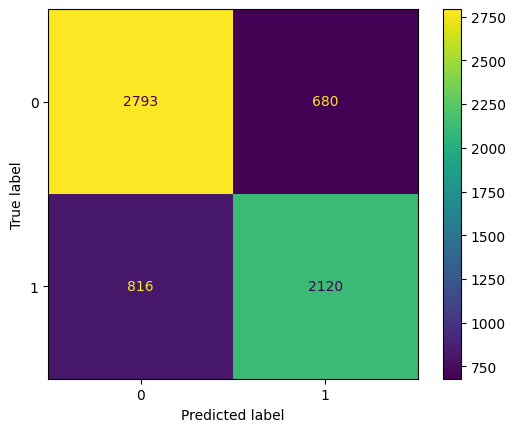

In [26]:
# cross_val_predict returns the predictions for each data point in the validation sets
lr2_val_preds = cross_val_predict(lr2, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf)

lr2_cm = confusion_matrix(y_train["seasonal_vaccine"], lr2_val_preds, labels=[0, 1])
lr2_disp = ConfusionMatrixDisplay(confusion_matrix=lr2_cm,
                              display_labels=[0, 1])
lr2_disp.plot()
plt.show()

## Random Forest:

In [27]:
rf4 = RandomForestClassifier(n_jobs=-1)

rf4_cv = cross_validate(rf4, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(rf4_cv)

Train roc_auc: 100.0%
Train balanced_accuracy: 100.0%
Train precision: 100.0%
Train recall: 100.0%
Train f1: 100.0%
Train accuracy: 100.0%

Validation roc_auc: 84.7%
Validation balanced_accuracy: 76.9%
Validation precision: 76.7%
Validation recall: 72.5%
Validation f1: 74.5%
Validation accuracy: 77.3%


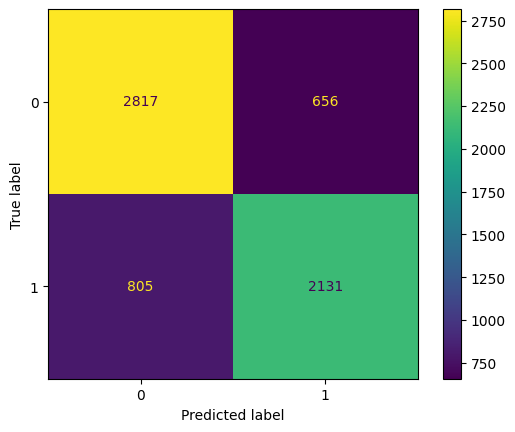

In [28]:
# cross_val_predict returns the predictions for each data point in the validation sets
rf4_val_preds = cross_val_predict(rf4, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf)

rf4_cm = confusion_matrix(y_train["seasonal_vaccine"], rf4_val_preds, labels=[0, 1])
rf4_disp = ConfusionMatrixDisplay(confusion_matrix=rf4_cm,
                              display_labels=[0, 1])
rf4_disp.plot()
plt.show()

In [29]:
# param_dist_rf = {
#     "n_estimators": np.arange(50, 2000, 50),
#     "max_depth": np.arange(2, 15),
#     "min_samples_split": np.arange(2, 25),
#     "min_samples_leaf": np.arange(2, 25),
#     "criterion": ['entropy', 'log_loss', 'gini'],
#     "max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# rf5_rscv = RandomizedSearchCV(RandomForestClassifier(),
#                              param_distributions=param_dist_rf,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)
# rf5_rscv.fit(X_train, y_train["seasonal_vaccine"].values.ravel())

# print_search_metrics(rf5_rscv)

In [30]:
rf5 = RandomForestClassifier(n_estimators=1_950,
                             min_samples_split=14,
                             min_samples_leaf=3,
                             max_features="sqrt",
                             max_depth = 14,
                             criterion = "log_loss",
                             n_jobs=-1)

rf5_cv = cross_validate(rf5, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(rf5_cv)

Train roc_auc: 94.3%
Train balanced_accuracy: 86.0%
Train precision: 86.9%
Train recall: 82.5%
Train f1: 84.6%
Train accuracy: 86.3%

Validation roc_auc: 85.0%
Validation balanced_accuracy: 77.2%
Validation precision: 77.1%
Validation recall: 72.7%
Validation f1: 74.8%
Validation accuracy: 77.6%


## Balanced Random Forest:
Despite this target is not so imbalanced, let's check the performance of this algorithm.

In [31]:
brf2 = BalancedRandomForestClassifier(bootstrap=True, sampling_strategy="auto", replacement=False)
brf2_cv = cross_validate(brf1, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf, scoring=scores, return_train_score=True)

print_metrics(brf2_cv)

Train roc_auc: 100.0%
Train balanced_accuracy: 100.0%
Train precision: 99.9%
Train recall: 100.0%
Train f1: 100.0%
Train accuracy: 100.0%

Validation roc_auc: 84.6%
Validation balanced_accuracy: 77.6%
Validation precision: 74.6%
Validation recall: 77.6%
Validation f1: 76.1%
Validation accuracy: 77.6%


In [32]:
# param_dist_brf2 = {
#     "n_estimators": np.arange(50, 2000, 50),
#     "criterion": ['entropy', 'gini'],
#     "max_depth": np.arange(2, 15),
#     "min_samples_split": np.arange(2, 50),
#     "min_samples_leaf": np.arange(2, 50),
#     "max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# brf2_rscv = RandomizedSearchCV(BalancedRandomForestClassifier(bootstrap=True, sampling_strategy = "auto", replacement=False),
#                              param_distributions=param_dist_brf2,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)

# brf2_rscv.fit(X_train, y_train["seasonal_vaccine"].values.ravel())

# print_search_metrics(brf2_rscv)

## Gradient Boosting Decission Trees (GBDT)

In [33]:
gbdt3 = GradientBoostingClassifier()

gbdt3_cv = cross_validate(gbdt3, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(gbdt3_cv)

Train roc_auc: 88.6%
Train balanced_accuracy: 80.5%
Train precision: 80.3%
Train recall: 76.9%
Train f1: 78.6%
Train accuracy: 80.8%

Validation roc_auc: 85.4%
Validation balanced_accuracy: 77.1%
Validation precision: 76.7%
Validation recall: 73.0%
Validation f1: 74.7%
Validation accuracy: 77.4%


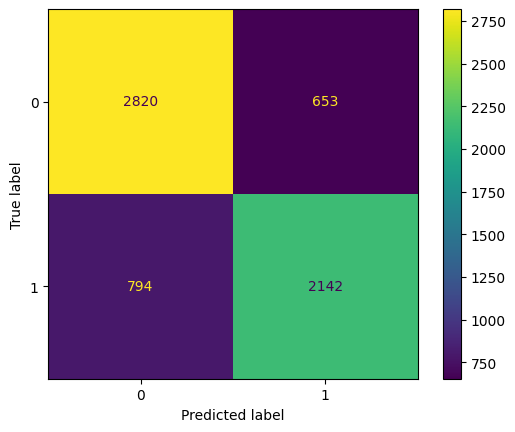

In [34]:
# cross_val_predict returns the predictions for each data point in the validation sets
gbdt3_val_preds = cross_val_predict(gbdt3, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf)

gbdt3_cm = confusion_matrix(y_train["seasonal_vaccine"], gbdt3_val_preds, labels=[0, 1])
gbdt3_disp = ConfusionMatrixDisplay(confusion_matrix=gbdt3_cm,
                              display_labels=[0, 1])
gbdt3_disp.plot()
plt.show()

In [35]:
# gbdt4_pipe = GradientBoostingClassifier()

# param_dist_gbdt = {
#     "loss": ["log_loss", "exponential"],
#     "learning_rate": np.arange(0.0000001, 0.25, 0.0025),
#     "n_estimators": np.arange(50, 2000, 50),
#     "max_depth": np.arange(2, 15),
#     "min_samples_split": np.arange(2, 25),
#     "min_samples_leaf": np.arange(1, 25),
#     "criterion": ['friedman_mse', 'squared_error'],
#     "max_features": ["sqrt", "log2", None, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# }

# gbdt4_rscv = RandomizedSearchCV(gbdt4_pipe,
#                              param_distributions=param_dist_gbdt,
#                              scoring=scores,
#                              n_iter=100,
#                              return_train_score=True,
#                              # Fuction to select the best model
#                              refit=lambda x: x["mean_test_roc_auc"].argmax(),
#                              cv=kf,
#                              verbose=1,
#                              n_jobs=-1)
# gbdt4_rscv.fit(X_train, y_train["seasonal_vaccine"].values.ravel())

# print_search_metrics(gbdt4_rscv)

In [36]:
gbdt4 = GradientBoostingClassifier(n_estimators=500,
                                   min_samples_split=6,
                                   min_samples_leaf=3,
                                   max_features="sqrt",
                                   max_depth=4,
                                   loss="log_loss",
                                   learning_rate=0.03,
                                   criterion="friedman_mse")

gbdt4_cv = cross_validate(gbdt4, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(gbdt4_cv)

Train roc_auc: 90.8%
Train balanced_accuracy: 82.9%
Train precision: 82.9%
Train recall: 79.7%
Train f1: 81.3%
Train accuracy: 83.2%

Validation roc_auc: 85.6%
Validation balanced_accuracy: 77.6%
Validation precision: 77.1%
Validation recall: 73.8%
Validation f1: 75.4%
Validation accuracy: 77.9%


# Testing
## `roc_auc_score` metric:
For this study, we'll need to test the performance from our algorithms using `roc_auc_score` metric. 

*Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.*

In [37]:
# H1N1 Vaccine:
lr1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(bl1_pipe, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))
rf1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(rf3_pipe, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))
blrf1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(brf1, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))
gbdt1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(gbdt2_pipe, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))

# Seasonal Vaccine:
lr2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(bl2, X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))
rf2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(rf5, X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))
blrf2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(brf2, X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))
gbdt2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(gbdt4, X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))

## Final Charts:
### H1N1 Vaccine:

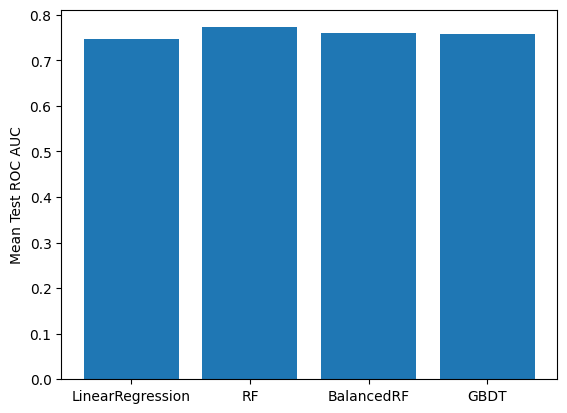

In [38]:
model_test_roc_auc1 = {
    'LinearRegression': lr1_test_res,
    'RF': rf1_test_res,
    'BalancedRF': blrf1_test_res,
    'GBDT': gbdt1_test_res
}

x = range(len(model_test_roc_auc1))
plt.bar(x, model_test_roc_auc1.values())
plt.xticks(x, model_test_roc_auc1.keys())
plt.ylabel('Mean Test ROC AUC')
plt.show()

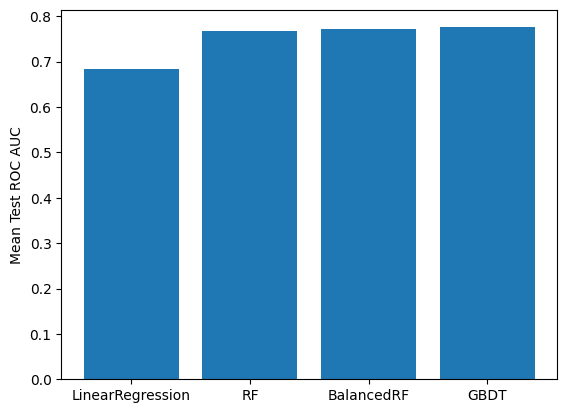

In [40]:
model_test_roc_auc2 = {
    'LinearRegression': lr2_test_res,
    'RF': rf2_test_res,
    'BalancedRF': blrf2_test_res,
    'GBDT': gbdt2_test_res
}

x = range(len(model_test_roc_auc2))
plt.bar(x, model_test_roc_auc2.values())
plt.xticks(x, model_test_roc_auc2.keys())
plt.ylabel('Mean Test ROC AUC')
plt.show()

# Training with the whole Dataset:
We'll now train the models with the whole available data, so we can have a better predictions for the sumbissions:

In [41]:
# H1N1 Vaccine:
h1n1_best = cross_validate(rf3_pipe, X, y["h1n1_vaccine"], cv=200,
                          scoring=scores, return_train_score=True, n_jobs=-1)

rf3_pipe.fit(X, y["h1n1_vaccine"])

print_metrics(h1n1_best)


Train roc_auc: 93.8%
Train balanced_accuracy: 85.8%
Train precision: 58.5%
Train recall: 88.5%
Train f1: 70.4%
Train accuracy: 84.3%

Validation roc_auc: 86.1%
Validation balanced_accuracy: 78.3%
Validation precision: 51.8%
Validation recall: 76.5%
Validation f1: 61.2%
Validation accuracy: 79.4%


In [42]:
# Seasonal Vaccine:
seasonal_best = cross_validate(gbdt4, X, y["seasonal_vaccine"], cv=200,
                          scoring=scores, return_train_score=True, n_jobs=-1)

gbdt4.fit(X, y["seasonal_vaccine"])

print_metrics(seasonal_best)

Train roc_auc: 89.8%
Train balanced_accuracy: 81.9%
Train precision: 81.9%
Train recall: 78.6%
Train f1: 80.2%
Train accuracy: 82.2%

Validation roc_auc: 86.1%
Validation balanced_accuracy: 78.4%
Validation precision: 78.7%
Validation recall: 74.4%
Validation f1: 76.0%
Validation accuracy: 78.7%


# Saving Best Models:

In [62]:
import pickle

In [ ]:
print(type(rf3_pipe))
print(type(gbdt4))

<class 'imblearn.pipeline.Pipeline'>
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [65]:
with open('Models/model_h1n1.pkl', 'wb') as b_h1n1:
    pickle.dump(rf3_pipe, b_h1n1)
    
with open('Models/model_seasonal.pkl', 'wb') as b_seas:
    pickle.dump(gbdt4, b_seas)

# Staking Classifier:

In [43]:
from sklearn.ensemble import StackingClassifier

## H1N1 Vaccine:

In [66]:
estimators = [
    ('lr', LogisticRegression(max_iter=10_000)),
    ('rf', ImbPipeline([
        ('RUS', RandomUnderSampler()),
        ('RF', RandomForestClassifier(n_estimators=1950, 
                                    min_samples_split= 8, 
                                    min_samples_leaf=2, 
                                    max_features="sqrt",
                                    max_depth= 14,
                                    criterion = "entropy",
                                    n_jobs=-1))
    ])),
    ('brf', BalancedRandomForestClassifier(bootstrap=True, sampling_strategy="auto", replacement=False)),
    ('gbt', ImbPipeline([
        ('RUS', RandomUnderSampler()),
        ('GBDT', GradientBoostingClassifier(n_estimators = 100,
                                            min_samples_split = 3,
                                            min_samples_leaf = 7,
                                            max_features = 0.7,
                                            max_depth = 2,
                                            loss = "log_loss",
                                            learning_rate = 0.175,
                                            criterion = "squared_error"))
    ]))
]

st1 = StackingClassifier(estimators=estimators)
st1_cv = cross_validate(st1, X_train, y_train["h1n1_vaccine"].values.ravel(), 
                        cv=kf, scoring=scores, return_train_score=True)

print_metrics(st1_cv)

Train roc_auc: 94.9%
Train balanced_accuracy: 80.6%
Train precision: 81.7%
Train recall: 65.2%
Train f1: 72.5%
Train accuracy: 89.5%

Validation roc_auc: 86.0%
Validation balanced_accuracy: 72.3%
Validation precision: 69.9%
Validation recall: 50.5%
Validation f1: 58.6%
Validation accuracy: 84.9%


In [51]:
# # H1N1 Vaccine:
# st1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(st1, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))

In [ ]:
# model_test_roc_auc1 = {
#     'LinearRegression': lr1_test_res,
#     'RF': rf1_test_res,
#     'BalancedRF': blrf1_test_res,
#     'GBDT': gbdt1_test_res,
#     'StackingClassifier': st1_test_res
# }

# x = range(len(model_test_roc_auc1))
# plt.bar(x, model_test_roc_auc1.values())
# plt.xticks(x, model_test_roc_auc1.keys())
# plt.ylabel('Mean Test ROC AUC')
# plt.show()

### Training with the whole data set:

In [67]:
st_h1n1 = StackingClassifier(estimators=estimators)

# Cross Validating:
h1n1_st = cross_validate(st_h1n1, X, y["h1n1_vaccine"], cv=20,
                          scoring=scores, return_train_score=True, n_jobs=-1)

st_h1n1.fit(X, y["h1n1_vaccine"])

print_metrics(h1n1_st)

Train roc_auc: 95.0%
Train balanced_accuracy: 80.5%
Train precision: 81.1%
Train recall: 65.0%
Train f1: 72.1%
Train accuracy: 89.4%

Validation roc_auc: 86.4%
Validation balanced_accuracy: 72.1%
Validation precision: 68.3%
Validation recall: 50.4%
Validation f1: 57.9%
Validation accuracy: 84.5%


### Saving the model:

In [68]:
with open('Models/model_h1n1_st.pkl', 'wb') as st:
    pickle.dump(st_h1n1, st)

## Seasonal Vaccine:

In [69]:
estimators2 = [
    ('lr', LogisticRegression(max_iter=10_000)),
    ('rf', RandomForestClassifier(n_estimators=1_950,
                             min_samples_split=14,
                             min_samples_leaf=3,
                             max_features="sqrt",
                             max_depth = 14,
                             criterion = "log_loss",
                             n_jobs=-1)),
    ('brf', BalancedRandomForestClassifier(bootstrap=True, sampling_strategy="auto", replacement=False)),
    ('gbt', GradientBoostingClassifier(n_estimators=500,
                                   min_samples_split=6,
                                   min_samples_leaf=3,
                                   max_features="sqrt",
                                   max_depth=4,
                                   loss="log_loss",
                                   learning_rate=0.03,
                                   criterion="friedman_mse"))
]


st1_cv = cross_validate(StackingClassifier(estimators=estimators2), X_train, y_train["seasonal_vaccine"].values.ravel(), 
                        cv=kf, scoring=scores, return_train_score=True)

print_metrics(st1_cv)

Train roc_auc: 94.6%
Train balanced_accuracy: 86.5%
Train precision: 86.6%
Train recall: 84.1%
Train f1: 85.3%
Train accuracy: 86.7%

Validation roc_auc: 85.7%
Validation balanced_accuracy: 77.7%
Validation precision: 77.2%
Validation recall: 74.0%
Validation f1: 75.5%
Validation accuracy: 78.0%


In [ ]:
# # Seasonal Vaccine:
# st2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(StackingClassifier(estimators=estimators2), X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))

In [ ]:
# model_test_roc_auc2 = {
#     'LinearRegression': lr2_test_res,
#     'RF': rf2_test_res,
#     'BalancedRF': blrf2_test_res,
#     'GBDT': gbdt2_test_res,
#     'StackingClassifier': st2_test_res
# }

# x = range(len(model_test_roc_auc2))
# plt.bar(x, model_test_roc_auc2.values())
# plt.xticks(x, model_test_roc_auc2.keys())
# plt.ylabel('Mean Test ROC AUC')
# plt.show()

### Training with the whole data set:

In [72]:
st_seas = StackingClassifier(estimators=estimators2)

# Cross Validating:
seas_st = cross_validate(st_seas, X, y["seasonal_vaccine"], cv=20,
                          scoring=scores, return_train_score=True, n_jobs=-1)

st_seas.fit(X, y["seasonal_vaccine"])

#print_metrics(st_seas)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                               ('rf',
                                RandomForestClassifier(criterion='log_loss',
                                                       max_depth=14,
                                                       min_samples_leaf=3,
                                                       min_samples_split=14,
                                                       n_estimators=1950,
                                                       n_jobs=-1)),
                               ('brf',
                                BalancedRandomForestClassifier(bootstrap=True,
                                                               replacement=False,
                                                               sampling_strategy='auto')),
                               ('gbt',
                                GradientBoostingClassifier(learning_rate=0.03,
                                                           max_depth=4,
                                                           max_features='sqrt',
                                                           min_samples_leaf=3,
                                                           min_samples_split=6,
                                                           n_estimators=500))])

### Saving Model:

In [73]:
with open('Models/model_seas_st.pkl', 'wb') as st:
    pickle.dump(st_seas, st)

# Catboost Classifier

## H1N1 Vaccine:

In [52]:
cb1_pipe = ImbPipeline([
    ('RUS', RandomUnderSampler()),
    ('cb', CatBoostClassifier(iterations=1_000, verbose=False))
 ])

cb1_cv = cross_validate(cb1_pipe, X_train, y_train["h1n1_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(cb1_cv)

Train roc_auc: 94.0%
Train balanced_accuracy: 86.9%
Train precision: 58.2%
Train recall: 91.4%
Train f1: 71.1%
Train accuracy: 84.3%

Validation roc_auc: 85.8%
Validation balanced_accuracy: 77.9%
Validation precision: 49.4%
Validation recall: 77.0%
Validation f1: 60.2%
Validation accuracy: 78.5%


In [53]:
# H1N1 Vaccine:
cb1_test_res = roc_auc_score(y_test["h1n1_vaccine"], cross_val_predict(cb1_pipe, X_test, y_test["h1n1_vaccine"].values.ravel(), cv=kf))

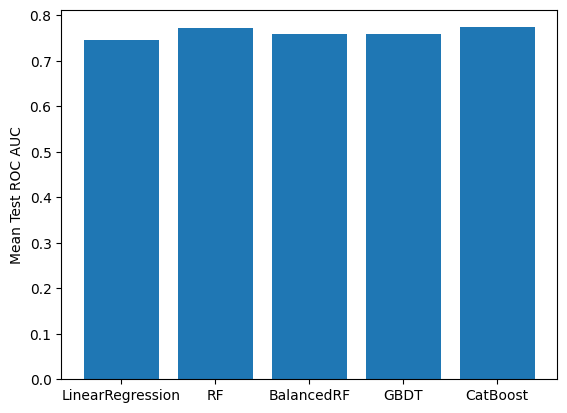

In [54]:
model_test_roc_auc1 = {
    'LinearRegression': lr1_test_res,
    'RF': rf1_test_res,
    'BalancedRF': blrf1_test_res,
    'GBDT': gbdt1_test_res,
#    'StackingClassifier': st1_test_res,
    'CatBoost': cb1_test_res
}

x = range(len(model_test_roc_auc1))
plt.bar(x, model_test_roc_auc1.values())
plt.xticks(x, model_test_roc_auc1.keys())
plt.ylabel('Mean Test ROC AUC')
plt.show()

### Training whit the whole DataSet:

In [59]:
cb_h1n1 = CatBoostClassifier(iterations=1_000, verbose=False)

# Cross Validating:
h1n1_cb = cross_validate(cb_h1n1, X, y["h1n1_vaccine"], cv=20,
                          scoring=scores, return_train_score=True, n_jobs=-1)

cb_h1n1.fit(X, y["h1n1_vaccine"])

print_metrics(h1n1_cb)

Train roc_auc: 96.0%
Train balanced_accuracy: 83.4%
Train precision: 90.3%
Train recall: 68.7%
Train f1: 78.0%
Train accuracy: 91.8%

Validation roc_auc: 86.3%
Validation balanced_accuracy: 71.8%
Validation precision: 72.2%
Validation recall: 48.7%
Validation f1: 58.0%
Validation accuracy: 85.1%


### Saving Model:

In [63]:
with open('Models/model_h1n1_cb.pkl', 'wb') as cb:
    pickle.dump(cb_h1n1, cb)

## Seasonal Vaccine:

In [55]:
cb2 = CatBoostClassifier(iterations=1_000, verbose=False)

cb2_cv = cross_validate(cb2, X_train, y_train["seasonal_vaccine"].values.ravel(), cv=kf,
                       scoring=scores, return_train_score=True)

print_metrics(cb2_cv)

Train roc_auc: 95.6%
Train balanced_accuracy: 88.7%
Train precision: 88.8%
Train recall: 86.6%
Train f1: 87.7%
Train accuracy: 88.9%

Validation roc_auc: 85.5%
Validation balanced_accuracy: 77.5%
Validation precision: 77.0%
Validation recall: 73.7%
Validation f1: 75.3%
Validation accuracy: 77.8%


In [56]:
# Seasonal Vaccine:
cb2_test_res = roc_auc_score(y_test["seasonal_vaccine"], cross_val_predict(cb2, X_test, y_test["seasonal_vaccine"].values.ravel(), cv=kf))

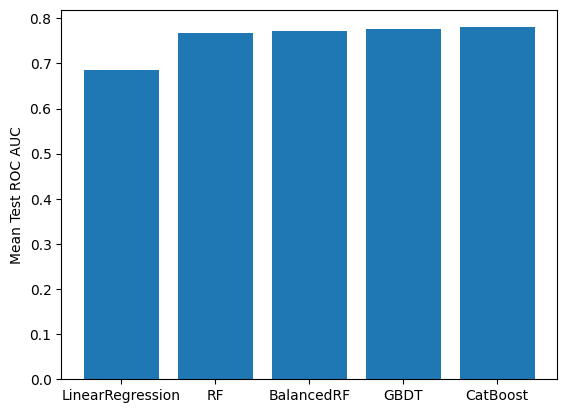

In [58]:
model_test_roc_auc2 = {
    'LinearRegression': lr2_test_res,
    'RF': rf2_test_res,
    'BalancedRF': blrf2_test_res,
    'GBDT': gbdt2_test_res,
#    'StackingClassifier': st2_test_res,
    'CatBoost': cb2_test_res
}

x = range(len(model_test_roc_auc2))
plt.bar(x, model_test_roc_auc2.values())
plt.xticks(x, model_test_roc_auc2.keys())
plt.ylabel('Mean Test ROC AUC')
plt.show()

### Training whit the whole DataSet:

In [57]:
cb_seas = CatBoostClassifier(iterations=1_000, verbose=False)

# Cross Validating:
seas_cb = cross_validate(cb_seas, X, y["seasonal_vaccine"], cv=20,
                          scoring=scores, return_train_score=True, n_jobs=-1)

cb_seas.fit(X, y["seasonal_vaccine"])

print_metrics(seas_cb)

Train roc_auc: 94.9%
Train balanced_accuracy: 87.9%
Train precision: 88.0%
Train recall: 85.6%
Train f1: 86.8%
Train accuracy: 88.0%

Validation roc_auc: 86.1%
Validation balanced_accuracy: 78.2%
Validation precision: 77.9%
Validation recall: 74.4%
Validation f1: 76.0%
Validation accuracy: 78.5%


### Saving Model:

In [64]:
with open('Models/model_seas_cb.pkl', 'wb') as cb:
    pickle.dump(cb_seas, cb)